# **Housing Price**
**The main objective of this case study is to apply EDA techniques using both 1D and 2D visualizations to gain insights and identify patterns within the housing price data.**


## Data Preparation

In [30]:
# Import Libraries and Packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

In [31]:
# Import data 
house = pd.read_csv("train_house.csv",index_col=0)
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [32]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
# Handling Missing Value
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [34]:
# Drop NaN Value
house.dropna(axis=1)
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [35]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [36]:
#get numeric data
num_cols=house._get_numeric_data().columns
house_numeric=house[num_cols]
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [37]:
#get categorical data
house_categorical=house.drop(num_cols,axis=1)
house_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:
house_numeric.to_csv('house_numeric.csv')
house_categorical.to_csv('house_categorical.csv')

## 1D Visualization 

In [55]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_numerical=pd.read_csv('house_numeric.csv')
house_categorical=pd.read_csv('house_categorical.csv')



## Categorical Variable

In [40]:
house_categorical.head()


,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Utilities

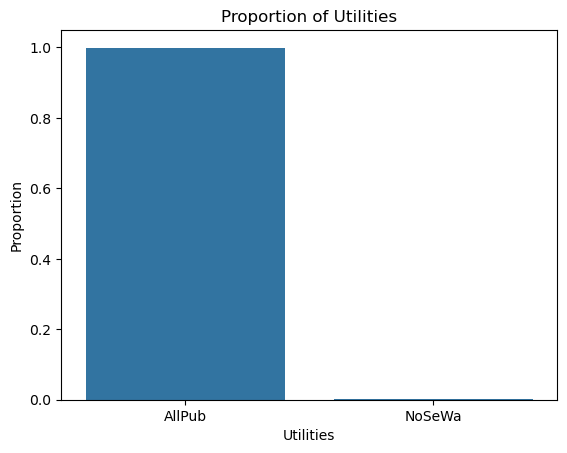

In [41]:
sns.barplot(x=house_categorical['Utilities'].value_counts().index, 
            y=house_categorical['Utilities'].value_counts(normalize=True))
plt.title('Proportion of Utilities')
plt.ylabel('Proportion')
plt.xlabel('Utilities')
plt.show()

From the chart below, we can observe that the data is imbalanced.

### House Style

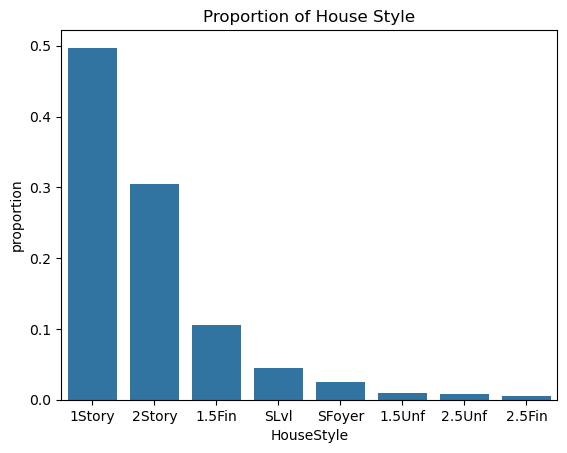

In [43]:
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
            y=house_categorical['HouseStyle'].value_counts(normalize=True))

plt.title('Proportion of House Style')
plt.show()

### Exterqual

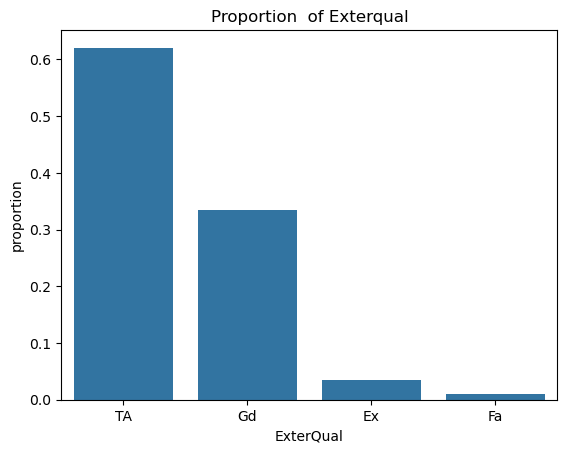

In [44]:
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
            y=house_categorical['ExterQual'].value_counts(normalize=True))
plt.title('Proportion  of Exterqual')
plt.show()

#### **Analysis Categorical Variable**

* Homes with one or two finished floors typically have average to good quality because they offer a practical balance between cost and value. These houses are affordable to build and maintain compared to high-quality homes, which can be expensive. At the same time, they provide better quality than low-grade homes, which may reduce their market appeal.

* Buyers tend to prefer homes with reasonable quality and price, making average to good quality homes more attractive in the market. Building homes with excellent quality can increase costs and reduce profit margins if the selling price does not increase proportionally. On the other hand, poor-quality homes may sell for less and have lower demand.

* In summary, average to good quality homes with one or two finished floors offer a reasonable combination of quality and cost, making them a popular and profitable choice.

## Numerical Variable

### SalePrice

median: 163000.0
mean: 180921.19589041095
std: 79442.50288288663


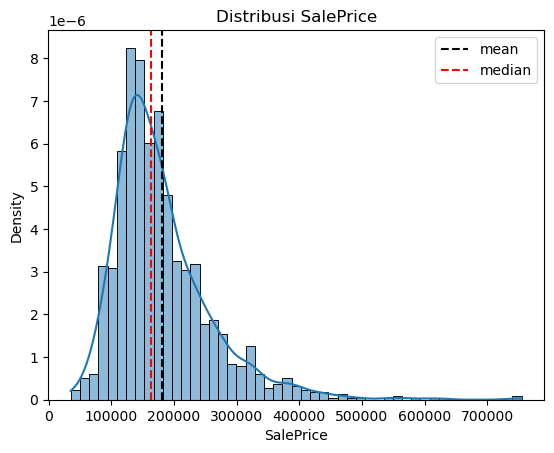

In [45]:
x=house_numeric['SalePrice']
sns.histplot(x, kde=True, stat='density', label='Histogram + KDE')
line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--' ,label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
plt.title('Distribusi SalePrice')
plt.xlabel('SalePrice')

print('median:',x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()


#### **Analysis of SalePrice Variable**
Based on Graph 1, the distribution is right-skewed, with most housing prices concentrated in the range of $10,000 - $30,000.



### GrLivArea

median: 1464.0
mean: 1515.463698630137
std: 525.4803834232027


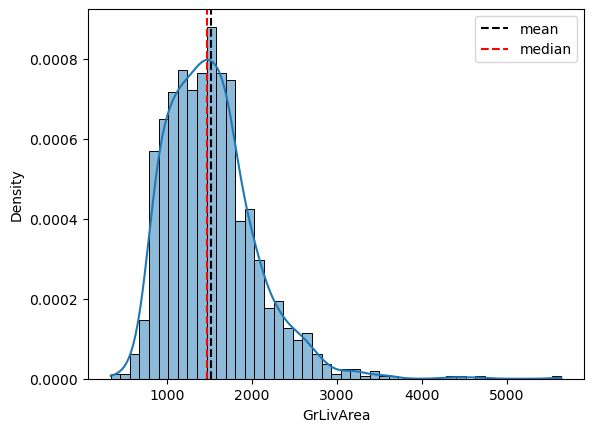

In [46]:
x=house_numeric['GrLivArea']
sns.histplot(x, kde=True,stat='density', label='Histogram + KDE')
line1=plt.axvline(x.mean(), color='k',linestyle='--',label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
print('median:', x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()
      

#### **Analysis of GrLivArea Variable **

Based on Graph 1, the distribution is also right-skewed, with most area concentrated in the range of 1000sqft and 3000sqft.
  

### GarageArea


median: 480.0
mean: 472.9801369863014
std: 213.80484145338076


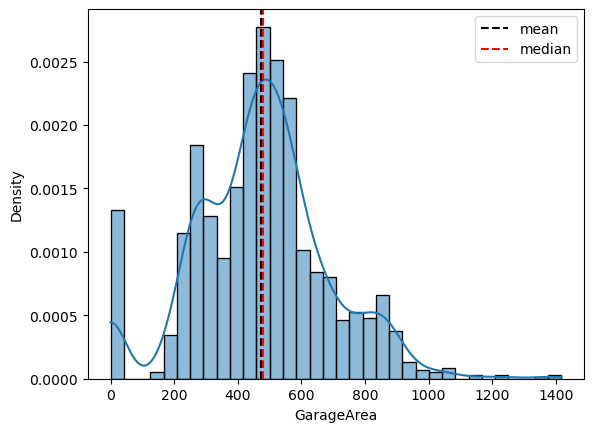

In [47]:
x=house_numeric['GarageArea']
sns.histplot(x, kde=True, stat='density', label='Histogram + KDE') 
line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--',label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
print('median:', x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()

In [48]:
print('number of nonzero values:',np.sum(house_numeric['GarageArea'] != 0))
print('number of zero values:',np.sum(house_numeric['GarageArea'] == 0))


number of nonzero values: 1379
number of zero values: 81


median: 484.0
mean: 500.76214648295866
std: 185.68051979433156


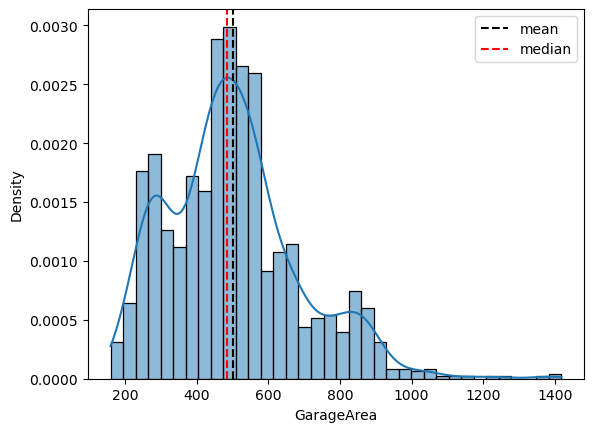

In [49]:
x=house_numeric['GarageArea'][house_numeric['GarageArea']!=0]
sns.histplot(x, kde=True, stat='density', label='Histogram + KDE') 
line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--',label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
print('median:', x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()

#### **Analysis of GarageArea Variable**
From the first graph, we observed that some entries in the 'GarageArea' column have a value of zero, indicating that certain houses do not have a garage. We then counted how many houses fall into this category and created a new visualization focusing only on the houses that have a garage.

## Processing of Numerical Variables

### SalePrice

median: 5.212187604403958
mean: 5.221978956475628
std: 0.17347974217176843


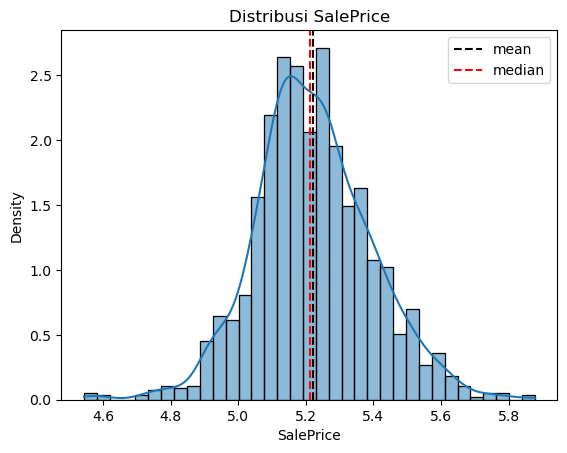

In [50]:
x = np.log10(house_numerical["SalePrice"])
sns.histplot(x, kde=True, stat='density', label='Histogram + KDE')
line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--' ,label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
plt.title('Distribusi SalePrice')
plt.xlabel('SalePrice')

print('median:',x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()


### GrLivArea

median: 3.165541076722373
mean: 3.156354310389778
std: 0.14485910869663873


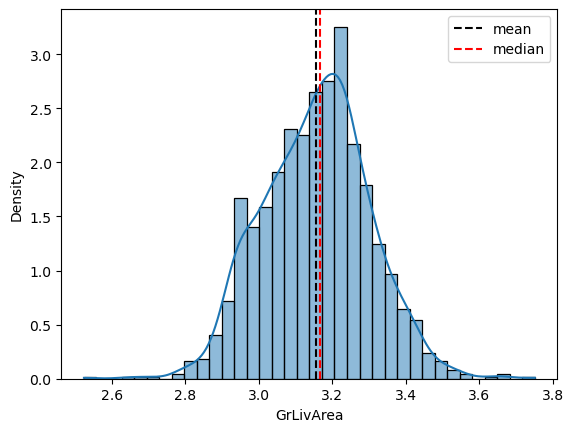

In [51]:
x=np.log10(house_numeric['GrLivArea'])
sns.histplot(x, kde=True,stat='density', label='Histogram + KDE')
line1=plt.axvline(x.mean(), color='k',linestyle='--',label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--', label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
print('median:', x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()

### GarageArea

median: 2.6848453616444123
mean: 2.6696154158200915
std: 0.16427840573730204


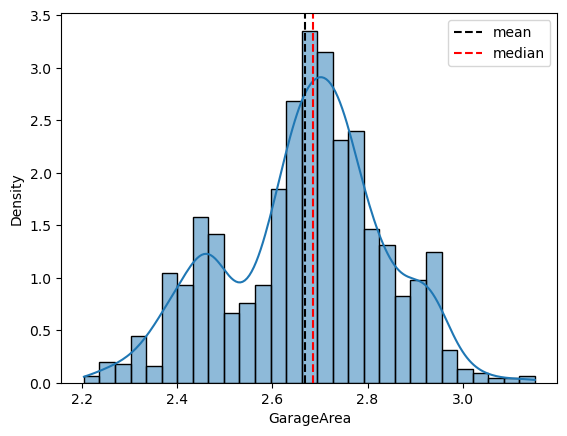

In [52]:
x=np.log10(house_numeric['GarageArea'][house_numeric['GarageArea']!=0])
sns.histplot(x, kde=True, stat='density', label='Histogram + KDE') 
line1=plt.axvline(x.mean(), color='k', linestyle='--', label='mean')
line2=plt.axvline(np.median(x), color='r', linestyle='--',label='median')
first_legend=plt.legend(handles=[line1,line2], loc='upper right')
print('median:', x.median())
print('mean:', x.mean())
print('std:', x.std())
plt.show()

#### **Explanation and Analysis of Processing Data**
- The original numerical data showed a right-skewed distribution. To address this, a log10 transformation was applied.
- After the transformation, the distribution became more symmetrical and closer to normal, making it more suitable for statistical analysis and modeling, such as linear regression

## 2D Visualization

### GrLivArea and SalePrice

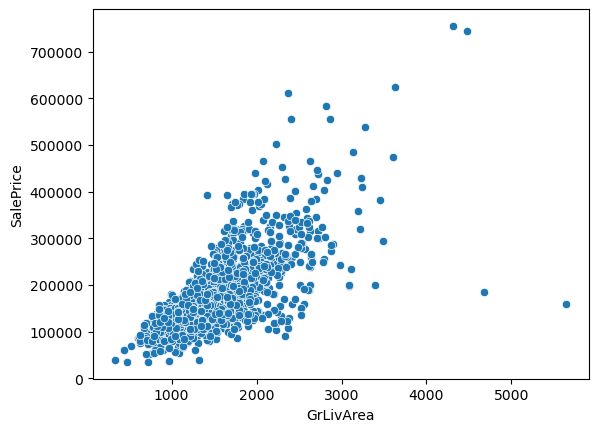

In [53]:
ax = sns.scatterplot(y='SalePrice', x='GrLivArea', data=house_numeric)
plt.show()

### GarageArea and SalePrice

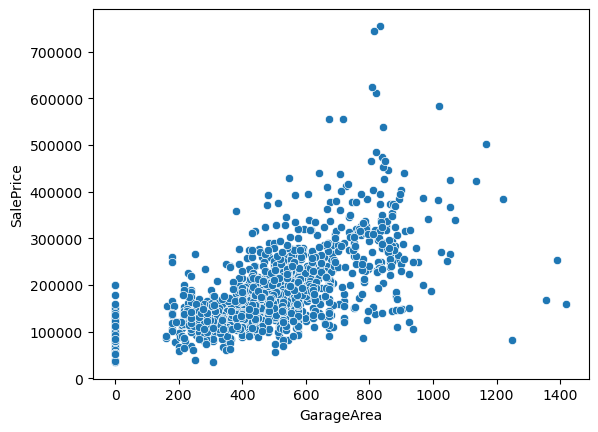

In [54]:
ax = sns.scatterplot(y='SalePrice',x='GarageArea', data=house_numeric)
plt.show()

#### **Hypothesis of the correlation for each variable**
The scatterplot indicates a positive correlation between SalePrice and both GrLivArea and GarageArea, suggesting that higher values in these variables are associated with higher sale prices.